# Analysis

Template for Jupyter notebooks running Python.

Version 0.1.0 \| First Created July 12, 2023 \| Updated August 01, 2023

## Jupyter Notebook

This is an Jupyter Notebook document. For more details on using a Jupyter Notebook see <https://docs.jupyter.org/en/latest/>.

### Setting up a computational environment. 
Please see proceedure/environment/readme.md for detailed instructions for how to replicate the computational environment used in this study.



# Title of Study

### Authors

- First Name Last Name\*, email address, @githubname, ORCID link, affiliated institution(s)
- First Name Last Name, email address, @githubname, ORCID link, affiliated institution(s)

\* Corresponding author and creator



### Abstract

Write a brief abstract about your research project.

If the project is a reproduction or replication study, include a declaration of the study type with a full reference to the original study.
For example:

This study is a *replication* of:

> citation to prior study

A graphical abstract of the study could also be included as an image here.



### Study metadata

- `Key words`: Comma-separated list of keywords (tags) for searchability. Geographers often use one or two keywords each for: theory, geographic context, and methods.
- `Subject`: select from the [BePress Taxonomy](http://digitalcommons.bepress.com/cgi/viewcontent.cgi?article=1008&context=reference)
- `Date created`: date when project was started
- `Date modified`: date of most recent revision
- `Spatial Coverage`: Specify the geographic extent of your study. This may be a place name and link to a feature in a gazetteer like GeoNames or OpenStreetMap, or a well known text (WKT) representation of a bounding box.
- `Spatial Resolution`: Specify the spatial resolution as a scale factor, description of the level of detail of each unit of observation (including administrative level of administrative areas), and/or or distance of a raster GRID size
- `Spatial Reference System`: Specify the geographic or projected coordinate system for the study, e.g. EPSG:4326
- `Temporal Coverage`: Specify the temporal extent of your study---i.e. the range of time represented by the data observations.
- `Temporal Resolution`: Specify the temporal resolution of your study---i.e. the duration of time for which each observation represents or the revisit period for repeated observations
- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

#### Original study spatio-temporal metadata

- `Spatial Coverage`: extent of original study
- `Spatial Resolution`: resolution of original study
- `Spatial Reference System`: spatial reference system of original study
- `Temporal Coverage`: temporal extent of original study
- `Temporal Resolution`: temporal resolution of original study



## Study design

Describe how the study relates to prior literature, e.g. is it a **original study**, **meta-analysis study**, **reproduction study**, **reanalysis study**, or **replication study**?

Also describe the original study archetype, e.g. is it **observational**, **experimental**, **quasi-experimental**, or **exploratory**?

Enumerate specific **hypotheses** to be tested or **research questions** to be investigated here, and specify the type of method, statistical test or model to be used on the hypothesis or question.


## Proceedure

In [43]:
# Import the necessary packages
import geopandas as gpd
import pandas as pd
import geodatasets as gds
import yaml
import os
import numpy as np
import osmnx as ox
import pyogrio
import networkx as nx

In [2]:
# Write the YAML file with package dependencies
##create if statement set to false so that this wont always run ***!
## code adapted from python land https://python.land/data-processing/python-yaml#What_is_YAML
requirements = """
- openpyxl
- pyyaml
"""
req = yaml.safe_load(requirements)
with open ('req.yaml', 'w') as file:
    yaml.dump(req, file)

print(open('req.yaml').read())

- openpyxl
- pyyaml



In [30]:
# move req file to envs folder 
os.replace("req.yaml", "../environment/req.yaml") 

In [31]:
path = os.path.abspath('req.yaml')
print(path)

C:\Users\gsokolow\Documents\GitHub\Flooding-and-Healthcare-2024\procedure\code\req.yaml


In [3]:
# Import 2018 Census Data for Statistical Area 1s
# Select only the columns we're interested in
sa1 = pd.read_csv("../../data/derived/public/Individual_part1_totalNZ-wide_format_updated_16-7-20_adjusted_labels.csv",
                     usecols = ['Area_code_and_description', #uniqueid for sa1 
                                'Census_2018_usually_resident_population_count', #total pop
                                'Census_2018_Sex_1_Male_CURP', 'Census_2018_Sex_2_Female_CURP', 'Census_2018_Sex_Total_CURP', #sex
                                'Census_2018_median_age_CURP', 'Census_2018_Age_broad_groups_1_Under_15_years_CURP', 'Census_2018_Age_broad_groups_2_15_to_29_years_CURP', 
                                'Census_2018_Age_broad_groups_3_30_to_64_years_CURP', 'Census_2018_Age_broad_groups_4_65_years_and_over_CURP', 
                                'Census_2018_Age_broad_groups_Total_CURP', #age
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_1_5_Middle_Eastern_Latin_American_African_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP', 'Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP',
                                'Census_2018_Ethnicity_grouped_total_responses_Total_CURP', #ethnicity,
                                'Census_2018_Maori_descent_01_Maori_descent_CURP', 'Census_2018_Maori_descent_02_No_Maori_descent_CURP', 'Census_2018_Maori_descent_04_Dont_know_CURP',
                                'Census_2018_Maori_descent_Total_stated_CURP', 'Census_2018_Maori_descent_99_Not_elsewhere_included_CURP', 'Census_2018_Maori_descent_Total_CURP'
                               ],
                 na_values = 'C') #replaces 'C' for confidential with NaN. 


In [4]:
# Make sure the data loaded in correctly. It did! YAY!
sa1.head()

,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,Census_2018_Sex_2_Female_CURP,Census_2018_Sex_Total_CURP,Census_2018_median_age_CURP,Census_2018_Age_broad_groups_1_Under_15_years_CURP,Census_2018_Age_broad_groups_2_15_to_29_years_CURP,Census_2018_Age_broad_groups_3_30_to_64_years_CURP,Census_2018_Age_broad_groups_4_65_years_and_over_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,SA1 7000000,141,75.0,66.0,141,48.1,24.0,30.0,69.0,21.0,...,0.0,141.0,0.0,141,135.0,6.0,3.0,141.0,0.0,141
1,SA1 7000001,114,60.0,54.0,114,36.5,30.0,21.0,48.0,18.0,...,0.0,114.0,0.0,114,96.0,18.0,0.0,114.0,0.0,114
2,SA1 7000002,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
3,SA1 7000003,225,120.0,105.0,225,30.5,57.0,54.0,75.0,36.0,...,0.0,225.0,0.0,225,210.0,15.0,0.0,225.0,0.0,225
4,SA1 7000004,138,69.0,66.0,138,52.2,24.0,15.0,69.0,30.0,...,0.0,138.0,0.0,138,102.0,30.0,3.0,138.0,0.0,138


In [5]:
## remove the leading SA1 prefix for area codes. This is necessary for the join to work with the geometric data.
sa1["Area_code_and_description"]=sa1.Area_code_and_description.str.replace("SA1 ","", regex = True)

In [6]:
# Import the definitions of the variables we are interested in (created by author based on best available information)
sa1_sel_defs = pd.read_csv("../../data/metadata/2018_Census_Statistical_Area1_Definitions_for_select_variables.csv", index_col = 0, dtype = object)

## Generate metadata
Now, we're going to generate some information about the datasets we're using.

In [7]:
samin = pd.DataFrame(sa1.min(0).rename('minimum'))

In [8]:
samax = pd.DataFrame(sa1.max(0).rename('maximum'))

In [9]:
sa1.isna().sum()

Area_code_and_description                                                                               0
Census_2018_usually_resident_population_count                                                           0
Census_2018_Sex_1_Male_CURP                                                                           575
Census_2018_Sex_2_Female_CURP                                                                         575
Census_2018_Sex_Total_CURP                                                                              0
Census_2018_median_age_CURP                                                                           592
Census_2018_Age_broad_groups_1_Under_15_years_CURP                                                    620
Census_2018_Age_broad_groups_2_15_to_29_years_CURP                                                    620
Census_2018_Age_broad_groups_3_30_to_64_years_CURP                                                    614
Census_2018_Age_broad_groups_4_65_years_and_ov

In [10]:
freqna = ((sa1.isna().sum())/len(sa1)).rename('NaN frequency')

In [11]:
sa1_types = sa1.dtypes.rename('data type')

In [12]:
#let's make a big table to display all the metadata
meta_nums = pd.DataFrame(sa1_types)
meta_nums = meta_nums.join(samin, rsuffix = 'min')
meta_nums = meta_nums.join(samax, rsuffix = 'max')
meta_nums = meta_nums.join(freqna, rsuffix = 'freq NA')
meta_nums = meta_nums.join(sa1_sel_defs)


In [13]:
meta_nums.head()

,data type,minimum,maximum,NaN frequency,definition
Area_code_and_description,object,001 Far North District,Total NZ (Ward),0.000000,unique identifier for statistical area 1
Census_2018_usually_resident_population_count,int64,0,4699755,0.000000,number of usual residents (as opposed to popul...
Census_2018_Sex_1_Male_CURP,float64,0.0,2319558.0,0.017681,number of usual male residents in 2018
Census_2018_Sex_2_Female_CURP,float64,0.0,2380197.0,0.017681,number of usual female residents in 2018
Census_2018_Sex_Total_CURP,int64,0,4699755,0.000000,total number of usual residents for which data...


In [14]:
# Save the Metadata
meta_nums.to_csv('../../data/metadata/2018_Census_Statistical_Area1_Metadata_Derived.csv')

### Calculate percentages
Deviation from analysis plan. For ease of implementation, calculate the population percentages for each of the following variables PRIOR to joining the attribute data with the statistical area 1 geometry.
    - Census_2018_Ethnicity_grouped_total_responses_level_1_1_European_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP
   - Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP
   - Census_2018_Maori_descent_01_Maori_descent_CURP
   - Census_2018_Maori_descent_02_No_Maori_descent_CURP
   - Census_2018_Maori_descent_04_Dont_know_CURP

In [15]:
sa1_pct = sa1[
["Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP",
    "Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP",
    "Census_2018_Maori_descent_01_Maori_descent_CURP",
    "Census_2018_Maori_descent_02_No_Maori_descent_CURP",
    "Census_2018_Maori_descent_04_Dont_know_CURP"]
].div(sa1["Census_2018_usually_resident_population_count"], axis = "rows")

In [16]:
sa1_pct.head()

,Census_2018_Ethnicity_grouped_total_responses_level_1_3_Pacific_Peoples_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_2_Maori_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_4_Asian_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_6_Other_Ethnicity_CURP,Census_2018_Ethnicity_grouped_total_responses_level_2_61_New_Zealander_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP
0,0.063830,0.893617,0.021277,0.0,0.0,0.957447,0.042553,0.021277
1,0.131579,0.815789,0.000000,0.0,0.0,0.842105,0.157895,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.093333,0.920000,0.013333,0.0,0.0,0.933333,0.066667,0.000000
4,0.043478,0.717391,0.021739,0.0,0.0,0.739130,0.217391,0.021739


## Read SA1 geometry data

In [17]:
sa1_geom = gpd.read_file("../../data/raw/public/statistical-area-1-2018-generalised.gpkg")

In [18]:
sa1_geom.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647..."
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648..."
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681..."
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658..."
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848..."


In [19]:
#merge geodataframe with attribute data
sa1_geom_m = pd.merge(sa1_geom, sa1, left_on="SA12018_V1_00", right_on="Area_code_and_description")

In [20]:
sa1_geom_m.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,...,0.0,153.0,0.0,153,24.0,126.0,3.0,153.0,0.0,153
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,...,0.0,180.0,0.0,180,54.0,120.0,6.0,180.0,0.0,180
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,...,0.0,120.0,0.0,120,18.0,102.0,3.0,120.0,0.0,120
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,...,0.0,204.0,0.0,204,18.0,186.0,0.0,204.0,0.0,204
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,...,0.0,141.0,0.0,141,27.0,105.0,12.0,141.0,0.0,141


<Axes: >

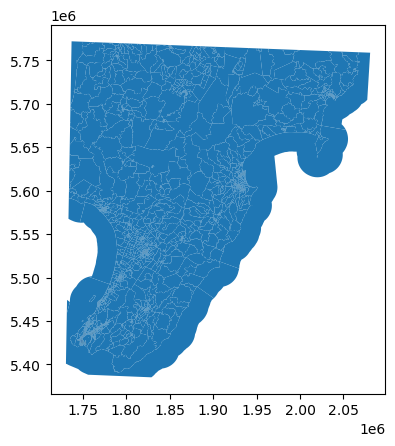

In [21]:
sa1_geom_m.plot()

### IM GOING TO NEED TO COME BACK HERE AND FILTER FOR ONLY HAWKES BAY - MAYBE USING AN OUTLINE?

In [22]:
#save the joined data
sa1_geom_m.to_file("../../data/derived/public/sa1_2018_joined.geojson", driver='GeoJSON')

In [49]:
# this would set the index of sa1_geom_m to the sa1 id to transfer to the centroids but it doesnt work :(
# sa1_geom_m.set_index(["SA12018_V1_00"])

,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,Census_2018_Sex_2_Female_CURP,...,Census_2018_Ethnicity_grouped_total_responses_level_2_69_Other_Ethnicity_nec_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP
SA12018_V1_00,,,,,,,,,,,,,,,,,,,,,
7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,84.0,...,0.0,153.0,0.0,153,24.0,126.0,3.0,153.0,0.0,153
7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,87.0,...,0.0,180.0,0.0,180,54.0,120.0,6.0,180.0,0.0,180
7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,63.0,...,0.0,120.0,0.0,120,18.0,102.0,3.0,120.0,0.0,120
7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,102.0,...,0.0,204.0,0.0,204,18.0,186.0,0.0,204.0,0.0,204
7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,66.0,...,0.0,141.0,0.0,141,27.0,105.0,12.0,141.0,0.0,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018787,12,Mainland,1.923971,1.923971,5770.463175,"MULTIPOLYGON (((1826170.306 5525031.148, 18266...",7018787,252,120.0,132.0,...,0.0,252.0,0.0,252,18.0,225.0,6.0,252.0,0.0,252
7018788,12,Mainland,24.301275,24.301275,27225.398913,"MULTIPOLYGON (((1824390.869 5522175.521, 18244...",7018788,153,78.0,75.0,...,0.0,153.0,0.0,153,12.0,141.0,3.0,153.0,0.0,153
7018853,12,Mainland,58.014089,58.014089,40014.256539,"MULTIPOLYGON (((1834479.067 5516957.303, 18345...",7018853,120,57.0,63.0,...,0.0,120.0,0.0,120,6.0,108.0,3.0,120.0,0.0,120


In [23]:
#calculate the pct of the population represented by each variable by dividing by the total population


### Create Centroids

In [50]:
sa1_c = sa1_geom_m.centroid

In [54]:
sa1_c_m = sa1_geom_m.assign(centroid = sa1_geom_m.centroid)

<Axes: >

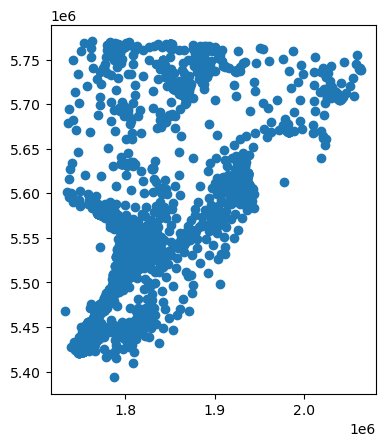

In [51]:
sa1_c.plot()

In [55]:
# in theory, this dataframe has both the sa1 id and the centroid
sa1_c_m.head()

,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry,Area_code_and_description,Census_2018_usually_resident_population_count,Census_2018_Sex_1_Male_CURP,...,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP,centroid
0,7017656,12,Mainland,20.538149,20.538149,25612.858923,"MULTIPOLYGON (((1764706.229 5594477.577, 17647...",7017656,153,72.0,...,153.0,0.0,153,24.0,126.0,3.0,153.0,0.0,153,POINT (1764608.921 5590887.326)
1,7017657,12,Mainland,15.116965,15.116965,26048.231791,"MULTIPOLYGON (((1764847.805 5587487.240, 17648...",7017657,180,90.0,...,180.0,0.0,180,54.0,120.0,6.0,180.0,0.0,180,POINT (1765929.419 5585265.571)
2,7017660,12,Mainland,11.117117,11.117117,20192.697724,"MULTIPOLYGON (((1768154.253 5589857.396, 17681...",7017660,120,60.0,...,120.0,0.0,120,18.0,102.0,3.0,120.0,0.0,120,POINT (1769630.342 5588390.698)
3,7017661,12,Mainland,15.730712,15.730712,24652.197813,"MULTIPOLYGON (((1765779.890 5588211.280, 17658...",7017661,204,105.0,...,204.0,0.0,204,18.0,186.0,0.0,204.0,0.0,204,POINT (1769580.604 5586518.715)
4,7016695,12,Mainland,211.980778,211.980778,92062.098112,"MULTIPOLYGON (((1884831.019 5593384.334, 18848...",7016695,141,75.0,...,141.0,0.0,141,27.0,105.0,12.0,141.0,0.0,141,POINT (1881865.661 5590612.464)


In [52]:
sa1_c.head()

0    POINT (1764608.921 5590887.326)
1    POINT (1765929.419 5585265.571)
2    POINT (1769630.342 5588390.698)
3    POINT (1769580.604 5586518.715)
4    POINT (1881865.661 5590612.464)
dtype: geometry

### Read in LINZ Road Network data

In [26]:
rds = gpd.read_file("../../data/raw/public/nz-road-centrelines-topo-150k.gpkg")

<Axes: >

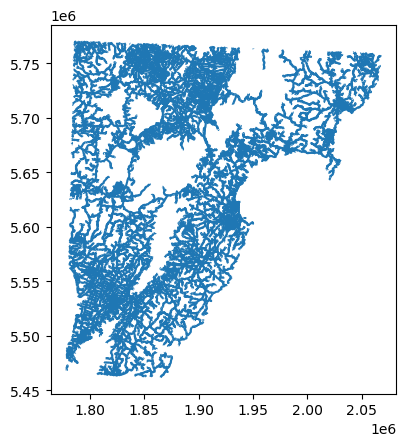

In [27]:
rds.plot()

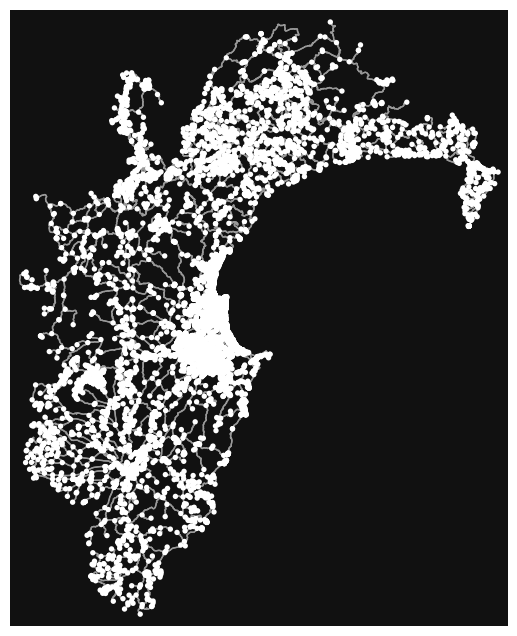

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [28]:
# alternate osm

G = ox.graph_from_place("Hawke's Bay, New Zealand")
ox.plot_graph(G)

In [29]:
## This code from Joe Holler Replication of Kang
%%time
# Turn nodes and edges into geodataframes
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

# Get unique counts of road segments for each speed limit
print(edges['maxspeed'].value_counts())
print(str(len(edges)) + " edges in graph")
#should be in km per hour
#not sure what it means to have multiple [,]

# can we also visualize highways / roads with higher speed limits to check accuracy?
# the code above converts the graph into an edges geodataframe, which could theoretically be filtered
# by fast road segments and mapped, e.g. in folium

maxspeed
50               17772
100               2108
80                 674
70                 608
20                 124
[100, 50]          123
30                  97
[100, 70]           69
[50, 70]            60
10                  39
[100, 80]           26
5                   24
40                  22
[80, 50]            18
[50, 80]            18
[80, 70]            16
[50, 20]            14
60                   8
[60, 50]             6
[60, 80]             4
[60, 100]            4
[100, 15]            2
[5, 50]              2
[40, 30]             2
[100, 30]            2
[40, 20]             2
[30, 80]             2
[100, 50, 70]        2
[5, 80]              2
[10, 50]             2
15                   2
[100, 80, 50]        1
[60, 50, 80]         1
[100, 50, 80]        1
[40, 60]             1
[60, 80, 50]         1
[60, 40]             1
Name: count, dtype: int64
55122 edges in graph
CPU times: total: 453 ms
Wall time: 993 ms


In [41]:
print(edges['maxspeed'].isna().sum())
#how many null values are there?

33262


There are 55122 total edges in the graph, and 33262 of them have no speed limit attribute. This needs to be addressed in order to estimate travel times to given locations. NOTE FOR FUTURE HONING -> INSERT APPROPRIATE BASE SPEED LIMIT

### NOTES TO RETURN TO FOR HONING THE NETWORK ANALYSIS
1. LINZ or OSM data? [This](https://stackoverflow.com/questions/58257528/osmnx-shortest-path-for-a-set-of-origins-and-destinations) might help with the workflow on LINZ
2. IF LINZ, how to filter?
3. If OSM, is it possible to get historic data? Is it necessary to save a particular date and read that file back in rather than querying each time?
4. What is an appropriate base speed to assign OSM roads that are missing that data?

In [42]:
edges.head()

osmid             name  \
u         v          key                                                     
357174131 1733626567 0                           31892922  Porangahau Road   
          357174213  0                           31892923  Porangahau Road   
          4537420072 0                          370128719   Wimbledon Road   
357174213 1733659763 0    [31893288, 31892923, 105251116]  Porangahau Road   
          357174131  0                           31892923  Porangahau Road   

                            highway  oneway reversed    length  \
u         v          key                                         
357174131 1733626567 0     tertiary   False    False   168.068   
          357174213  0    secondary   False    False  4076.653   
          4537420072 0    secondary   False     True  4331.556   
357174213 1733659763 0    secondary   False    False  4810.320   
          357174131  0    secondary   False     True  4076.653   

                                                                   geometry  \
u         v          key                                                      
357174131 1733626567 0    LINESTRING (176.60587 -40.30880, 176.60613 -40...   
          357174213  0    LINESTRING (176.60587 -40.30880, 176.59749 -40...   
          4537420072 0    LINESTRING (176.60587 -40.30880, 176.60586 -40...   
357174213 1733659763 0    LINESTRING (176.56948 -40.28825, 176.56871 -40...   
          357174131  0    LINESTRING (176.56948 -40.28825, 176.56954 -40...   

                         bridge maxspeed lanes service access  ref width  \
u         v          key                                                   
357174131 1733626567 0      NaN      NaN   NaN     NaN    NaN  NaN   NaN   
          357174213  0      NaN      NaN   NaN     NaN    NaN  NaN   NaN   
          4537420072 0      NaN      NaN   NaN     NaN    NaN  NaN   NaN   
357174213 1733659763 0      yes      NaN   NaN     NaN    NaN  NaN   NaN   
          357174131  0      NaN      NaN   NaN     NaN    NaN  NaN   NaN   

                         junction tunnel  
u         v          key                  
357174131 1733626567 0        NaN    NaN  
          357174213  0        NaN    NaN  
          4537420072 0        NaN    NaN  
357174213 1733659763 0        NaN    NaN  
          357174131  0        NaN    NaN

In [60]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
357174131,-40.308799,176.605869,3,NaN,NaN,POINT (176.60587 -40.30880)
357174213,-40.288245,176.569477,3,NaN,NaN,POINT (176.56948 -40.28825)
357191912,-40.161046,176.551639,3,NaN,NaN,POINT (176.55164 -40.16105)
1006197654,-40.298902,176.651823,1,NaN,NaN,POINT (176.65182 -40.29890)
1006197814,-40.298886,176.651231,3,NaN,NaN,POINT (176.65123 -40.29889)


In [ ]:
# in order to use the SA1 centroids we created, we have to add them to the OSM network.
ox.bearing.add_edge_bearing(G

#### Reproject the nodes and edges to NZGD2000
Attempting to put nodes and centroids in the same projection and concatenating them failed :( 
Next thing to try would be a join by location just to get the attribute of the sa1 key onto the point?

In [69]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
nodes = nodes.to_crs("NZGD2000 / New Zealand Transverse Mercator 2000")

In [73]:
edges = edges.to_crs("NZGD2000 / New Zealand Transverse Mercator 2000")

In [71]:
sa1_c_road = pd.concat([nodes, sa1_c_m])

In [74]:
sa1_c_road.head()

,y,x,street_count,highway,ref,geometry,SA12018_V1_00,LANDWATER,LANDWATER_NAME,LAND_AREA_SQ_KM,...,Census_2018_Ethnicity_grouped_total_responses_Total_stated_CURP,Census_2018_Ethnicity_grouped_total_responses_level_1_9_Not_Elsewhere_Included_CURP,Census_2018_Ethnicity_grouped_total_responses_Total_CURP,Census_2018_Maori_descent_01_Maori_descent_CURP,Census_2018_Maori_descent_02_No_Maori_descent_CURP,Census_2018_Maori_descent_04_Dont_know_CURP,Census_2018_Maori_descent_Total_stated_CURP,Census_2018_Maori_descent_99_Not_elsewhere_included_CURP,Census_2018_Maori_descent_Total_CURP,centroid
357174131,-40.308799,176.605869,3.0,NaN,NaN,POINT (1906438.242 5531725.788),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
357174213,-40.288245,176.569477,3.0,NaN,NaN,POINT (1903436.920 5534133.343),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
357191912,-40.161046,176.551639,3.0,NaN,NaN,POINT (1902486.379 5548317.267),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1006197654,-40.298902,176.651823,1.0,NaN,NaN,POINT (1910389.830 5532664.388),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1006197814,-40.298886,176.651231,3.0,NaN,NaN,POINT (1910339.532 5532668.255),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [47]:
sa1_c_road.tail()

,y,x,street_count,highway,ref,geometry,0
6728,NaN,NaN,NaN,NaN,NaN,None,POINT (1825654.649 5524446.369)
6729,NaN,NaN,NaN,NaN,NaN,None,POINT (1826435.722 5520076.877)
6730,NaN,NaN,NaN,NaN,NaN,None,POINT (1828817.368 5514910.495)
6731,NaN,NaN,NaN,NaN,NaN,None,POINT (1822314.902 5504050.159)
6732,NaN,NaN,NaN,NaN,NaN,None,POINT (1825341.931 5500701.847)


### Analysis

Describe the methods of analysis that will directly test the hypotheses or provide results to answer the research questions.
This section should explicitly define any spatial / statistical *models* and their *parameters*, including *grouping* criteria, *weighting* criteria, and *significance thresholds*.
Also explain any follow-up analyses or validations.



## Results

Describe how results are to be presented.



## Discussion

Describe how the results are to be interpreted *vis a vis* each hypothesis or research question.



## Integrity Statement

Include an integrity statement - The authors of this preregistration state that they completed this preregistration to the best of their knowledge and that no other preregistration exists pertaining to the same hypotheses and research.
If a prior registration *does* exist, explain the rationale for revising the registration here.



# Acknowledgements

- `Funding Name`: name of funding for the project
- `Funding Title`: title of project grant
- `Award info URI`: web address for award information
- `Award number`: award number

This report is based upon the template for Reproducible and Replicable Research in Human-Environment and Geographical Sciences, DOI:[10.17605/OSF.IO/W29MQ](https://doi.org/10.17605/OSF.IO/W29MQ)

## References